In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
%matplotlib inline

In [6]:
df=pd.read_excel('/content/Income.xlsx')
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45.0,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,28.0,United-States,"less than or equal to 50,000"
1,24.0,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
2,44.0,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,"greater than 50,000"
3,27.0,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0.0,0.0,40.0,Mexico,"less than or equal to 50,000"
4,20.0,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0.0,0.0,35.0,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34.0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594.0,0.0,60.0,United-States,"less than or equal to 50,000"
31974,34.0,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
31975,23.0,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
31976,42.0,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,"less than or equal to 50,000"


In [7]:
df.shape

(31978, 13)

In [8]:
df.dtypes

age              float64
JobType           object
EdType            object
maritalstatus     object
occupation        object
relationship      object
race              object
gender            object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
nativecountry     object
SalStat           object
dtype: object

In [10]:
df.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df[['capitalgain', 'capitalloss']]

,capitalgain,capitalloss
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
31973,594.0,0.0
31974,0.0,0.0
31975,0.0,0.0
31976,0.0,0.0


In [12]:
df.drop(columns=['capitalgain', 'capitalloss' ,'maritalstatus' ,'relationship'], inplace=True)

In [13]:
df.shape

(31978, 9)

In [14]:
df.SalStat.value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [15]:
cols = ['JobType', 'EdType',  'occupation',  'race', 'gender', 'nativecountry', 'SalStat']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [16]:
df.head()

,age,JobType,EdType,occupation,race,gender,hoursperweek,nativecountry,SalStat
0,45.0,4,11,1,4,0,28.0,38,1
1,24.0,1,11,2,4,1,40.0,38,1
2,44.0,4,15,10,4,1,40.0,38,0
3,27.0,4,6,3,4,1,40.0,25,1
4,20.0,4,15,12,4,1,35.0,38,1


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['SalStat']), df['SalStat'], test_size = 0.4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19186, 8), (19186,), (12792, 8), (12792,))

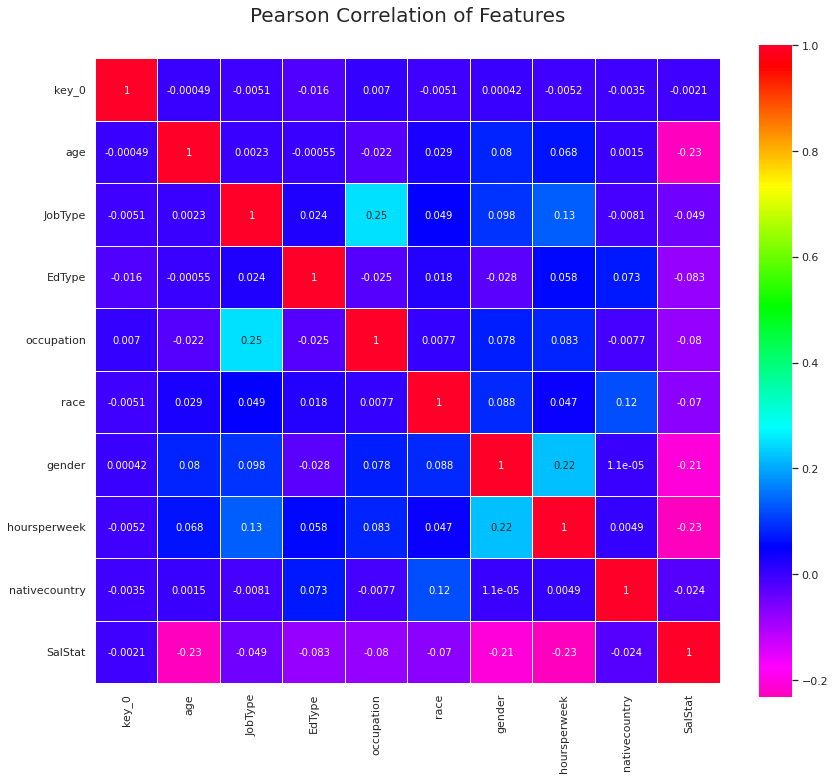

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [19]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []

In [25]:
algo = "Support Vector Machine"
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Logistic Regression is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Logistic Regression is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Logistic Regression is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Logistic Regression is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Support Vector Machine
[[   0 3100]
 [   0 9692]] 


Accuracy Logistic Regression is : 75.7661038148843
Recall Logistic Regression is : 100.0
Precision Logistic Regression is : 75.7661038148843
F score Logistic Regression is : 86.21241771926704


In [32]:
algo = "Gradient Boost"
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Logistic Regression is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Logistic Regression is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Logistic Regression is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Logistic Regression is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Gradient Boost
[[1502 1598]
 [ 695 8997]] 


Accuracy Logistic Regression is : 82.07473420888056
Recall Logistic Regression is : 92.82913743293439
Precision Logistic Regression is : 84.91741387446909
F score Logistic Regression is : 88.6971952481885


In [33]:
algo = "Ada Boost"
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Logistic Regression is :', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall Logistic Regression is :', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision Logistic Regression is :', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score Logistic Regression is :', f1s)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Ada Boost
[[1464 1636]
 [ 732 8960]] 


Accuracy Logistic Regression is : 81.48843026891808
Recall Logistic Regression is : 92.44737928188196
Precision Logistic Regression is : 84.5602114005285
F score Logistic Regression is : 88.32807570977918


In [34]:
new = pd.DataFrame(list(zip(algos ,accuracy,recall ,precision ,f1Score)), columns = ('algo' ,'acc' ,'rec' ,'pre','f1s'))
new

,algo,acc,rec,pre,f1s
0,Support Vector Machine,75.766104,100.000000,75.766104,86.212418
1,Gradient Boost,82.074734,92.829137,84.917414,88.697195
2,Ada Boost,81.488430,92.447379,84.560211,88.328076


<BarContainer object of 3 artists>

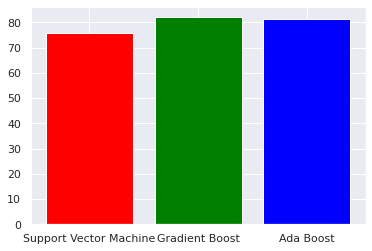

In [35]:
plt.bar(algos, accuracy,width = 0.8, color = ['red', 'green','blue'])